# Metro Interstate Traffic Volume Analysis Notebook

## Data Importation

In [104]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
traffic = pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/Metro_Interstate_Traffic_Volume.csv'

## Introduction
Before doing EDA or further data anlysis, it is important to explore and perform data cleaning to check for any irregularities in the dataset and to see if any additional columns are needed. Our original data contains 9 columns and 48,204 rows. Specifically, the explanatory variables are holiday, temperature, amount of rain per hour, amount of snow per hour, coverage of clounds, type of weather, description of weather, and date time. The last column is the response variable traffic_volume.

In [ ]:
traffic.head()

In [ ]:
traffic.shape

In [ ]:
traffic.dtypes

## Data Preprocessing

Upon observing the original data frame, we think it is helpful to extract new columns froms the `date_time` variable to better aid the analysis process. Thus, the `date`, `month`, and `hour` variables are created because these might be important factors that correlates to the traffic volume change.

In [ ]:
# create new variables
traffic['date_time'] = pd.to_datetime(traffic.date_time)
traffic['date'] = traffic.date_time.dt.date
traffic['hour'] = traffic.date_time.dt.hour
traffic['month'] = traffic.date_time.dt.month

Weekday vs weekend affects traffic volume because each day of week may have different patterns. Therefore, categorical variable `weekday` is added to our dataset, another variable `is_weekend` is added with weekdays encoded as False and weekends encoded as True.

In [ ]:
traffic['weekday'] = traffic.date_time.dt.weekday

def encode_weekend(x):
    if x == 5 or x == 6:
        return True
    else:
        return False
traffic['is_weekend'] = traffic['weekday'].map(encode_weekend)

We observe that there is one outlier for the `rain_1h`. We drop the irregular observation because it is clearly a mistake. For most observations, the amount of rain is 0 since there is no rain for most of the times. To better train our data, we transform the numerical variable of `rain_1h` to catagorical variables `rain_level` describing the level of rain.

In [ ]:
sns.boxplot('rain_1h', data = traffic)
plt.savefig('figures/rain_1h.png')

In [106]:
traffic = traffic.loc[traffic.rain_1h<8000]

In [107]:
def encode_rain_level(x):
    if x < 0.5:
        return 'No rain'
    elif x < 2:
        return 'Weak rain'
    elif x < 6:
        return 'Moderate Rain'
    elif x < 10:
        return 'Heavy Rain'
    else:
        return 'Extreme Rain'
traffic['rain_level'] = traffic['rain_1h'].map(encode_rain_level)

Similary, `snow_1h` is divided into 3 categories as the new column `snow_level`, with no snow, small snow, and big snow. 

In [108]:
def encode_snow_level(x):
    if x == 0:
        return 'No snow'
    elif x < 0.25:
        return 'Small snow'
    else:
        return 'Big snow'
traffic['snow_level'] = traffic['snow_1h'].map(encode_snow_level)

The `temperature` variable in the original data uses the unit of kelvin. To better interpret the variable, we transform the unit to celsius. There are also outliers for the temperature which is also clearly mistakes, so we remove them.

In [109]:
traffic['temp'] = traffic['temp'] - 273.15

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'figures/temp.png'

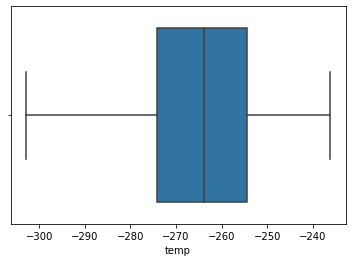

In [110]:
sns.boxplot('temp', data = traffic)
plt.savefig('figures/temp.png')

In [ ]:
traffic = traffic.loc[traffic.temp >= -50]

For the `holiday` variable, there are many of them, but only holiday vs non-holiday should be useful. Therefore, this column is transformed into True or False.

In [ ]:
def encode_holiday(x):
    if x == 'None':
        return False
    else:
        return True
traffic['holiday'] = traffic['holiday'].map(encode_holiday)

## Finalized Dataset

Upon finishing the data preprocessing and cleaning, the final dataset has 48193 rows and 16 columns.

In [ ]:
traffic.head()

In [ ]:
traffic.shape

## Explanatory Data Analysis

Before building any models or perforing any analysis, we need to perform data visualizations to see how the variables relate to each other.

In [ ]:
plt.hist(traffic.traffic_volume, bins = 30)
plt.title('Distribution of traffic volume')
plt.ylabel('count')
plt.xlabel('traffic volume');
plt.savefig('figures/traffic_volume_hist.png')

Significant less traffic volume over weekends (5:Saturday, 6:Sunday)

In [ ]:
sns.boxplot(y='traffic_volume', x='weekday', data = traffic);
plt.savefig('figures/weekday_box.png')

In [ ]:
sns.boxplot(y='traffic_volume', x='is_weekend', data = traffic);
plt.savefig('figures/is_weekend_box.png')

Not much difference for traffic volume across different months

In [ ]:
sns.boxplot(y='traffic_volume', x='month', data = traffic);
plt.savefig('figures/month_box.png')

In [ ]:
sns.boxplot(y='traffic_volume', x='snow_level', data = traffic);
plt.savefig('figures/snow_level_box.png')

In [ ]:
sns.boxplot(y='traffic_volume', x='rain_level', data = traffic);
plt.savefig('figures/rain_level_box.png')